In [1]:
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import cartopy.crs as ccrs
import pysplit
import geopandas as gpd

In [2]:
from __future__ import division

In [3]:
trajgroup = pysplit.make_trajectorygroup(r'C:/Users/80902/Desktop/run/wet0-4/*1960*')
print("number of 1960 trajectories:",trajgroup.trajcount)

number of 1960 trajectories: 10861


In [6]:
trajgroup[0].data

,Timestep,Pressure,Rainfall,Relative_Humidity,Specific_Humidity,Mixing_Ratio,Terrain_Altitude,Solar_Radiation,geometry,DateTime,Temperature_C,Temperature,Mixing_Depth
Timestep,,,,,,,,,,,,,
0.0,0.0,653.2,0.0,53.7,4.8,4.9,682.0,355.5,POINT Z (103.25000 19.50000 3000.00000),1960-05-14 00:00:00,None,None,None
-1.0,-1.0,648.8,0.0,51.4,4.6,4.6,717.2,101.7,POINT Z (103.10100 19.58900 3015.00000),1960-05-13 23:00:00,None,None,None
-2.0,-2.0,645.6,0.0,49.1,4.3,4.3,752.3,0.0,POINT Z (102.93800 19.65800 3020.00000),1960-05-13 22:00:00,None,None,None
-3.0,-3.0,643.1,0.0,46.5,4.0,4.1,787.1,0.0,POINT Z (102.75900 19.70600 3015.70000),1960-05-13 21:00:00,None,None,None
-4.0,-4.0,641.4,0.0,43.7,3.7,3.8,821.2,0.0,POINT Z (102.56800 19.73600 3003.10000),1960-05-13 20:00:00,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
-212.0,-212.0,679.4,0.0,36.7,1.5,1.5,2511.6,715.5,POINT Z (67.30600 34.17400 776.40000),1960-05-05 04:00:00,None,None,None
-213.0,-213.0,684.9,0.0,41.6,1.7,1.7,2440.3,514.3,POINT Z (67.00500 34.26400 784.00000),1960-05-05 03:00:00,None,None,None
-214.0,-214.0,689.5,0.0,46.0,1.9,1.9,2372.9,289.7,POINT Z (66.71800 34.36900 797.70000),1960-05-05 02:00:00,None,None,None


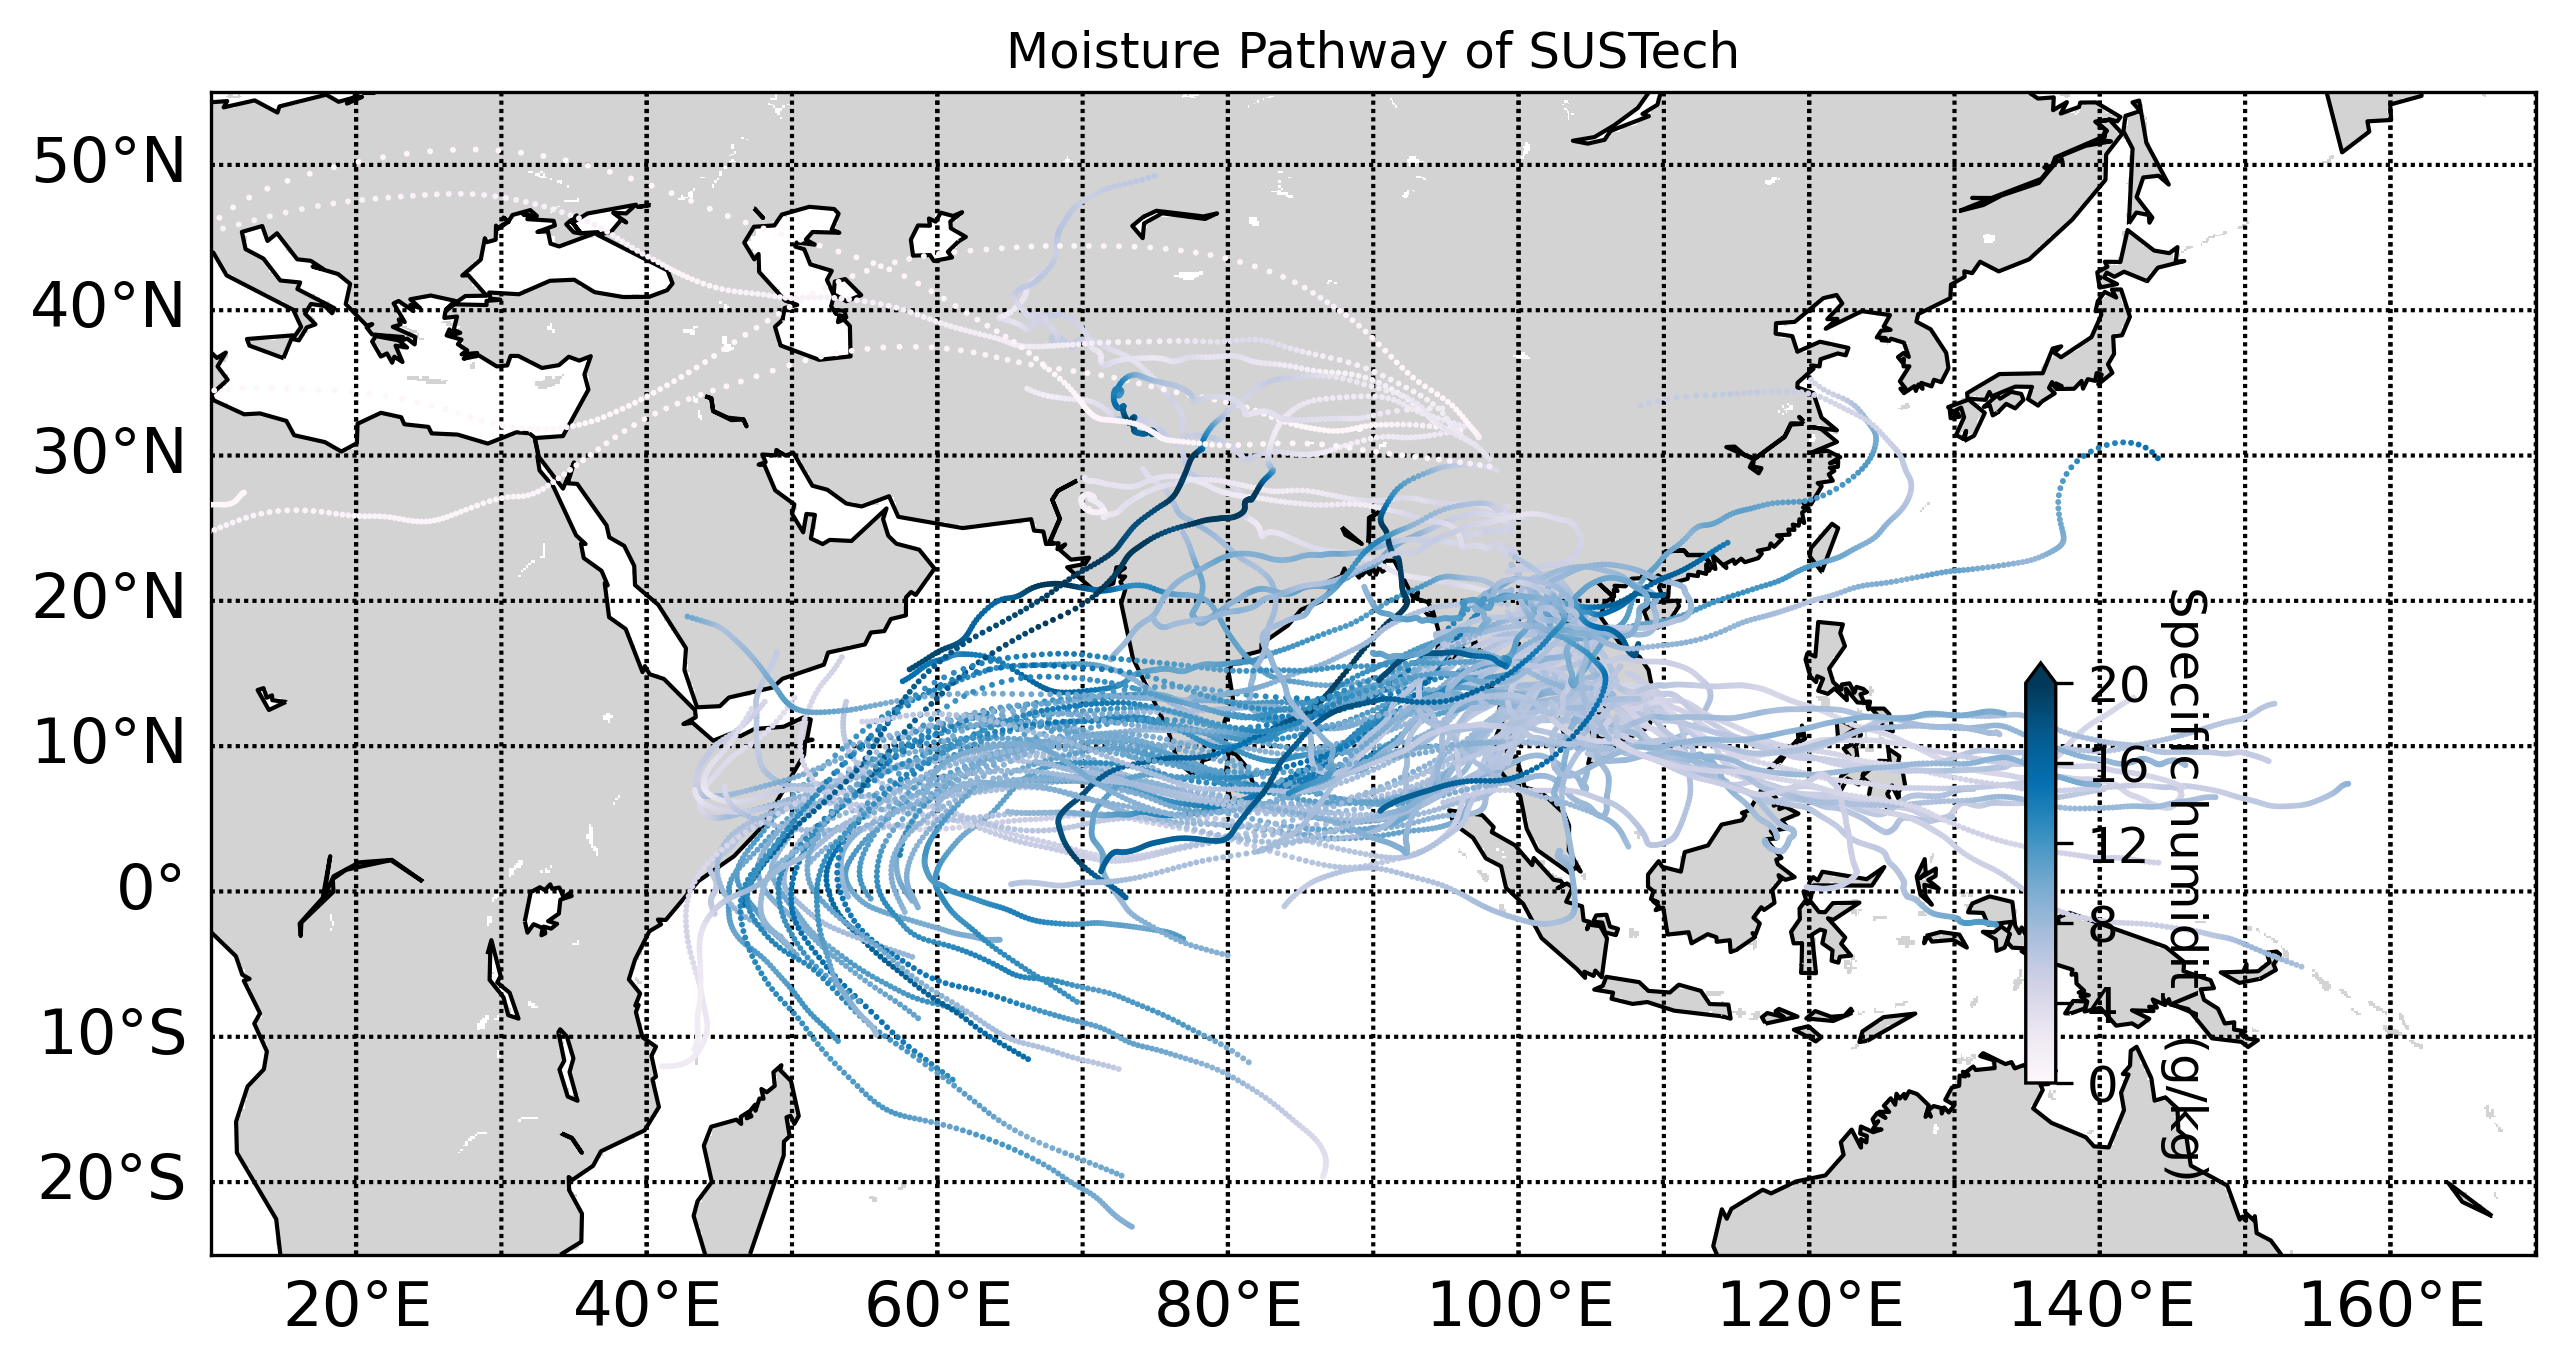

In [18]:
mapcorners = [10, -25, 170, 55]
standard_pm = None
fig, ax = plt.subplots(figsize=(10,7),dpi=300)

bmap_params = pysplit.MapDesign(mapcorners, 
                                standard_pm, 
                                projection = 'cyl',
                                mapcolor = None, 
                                latlon_spacing = (10,10),
                                latlon_labelspacing=(10,20),
                                lon_labels=["bottom"], 
                                latlon_fs=15,
                                drawoutlines=False,resolution="c",
                                )

bmap = bmap_params.make_basemap(ax=ax)
bmap.drawlsmask(land_color = "#d3d3d3", ocean_color="white",)
bmap.drawcoastlines()
plt.title('Moisture Pathway of SUSTech')
for traj in trajgroup[::100]:

    mappable = pysplit.traj_scatter(
        traj.data.Specific_Humidity	.astype(np.float64).values,
        traj.data.geometry.apply(lambda p: p.x).values,
        traj.data.geometry.apply(lambda p: p.y).values,
        bmap, colormap=plt.cm.PuBu,size=2,
        vmin=0, vmax=20, suppress_printmsg=False)


cax_position = [0.73, 0.3, 0.01, 0.2]
cax, cbar = pysplit.make_cax_cbar(fig, 
                                  cax_position, 
                                  mappable, 
                                  orientation='vertical',
                                  cbar_label='Specific humidity (g/kg)',
                                  extend='max')
cbar.ax.tick_params(axis='both', which='both', width=0.8, labelsize=12)
cbar.set_label('Specific humidity (g/kg)', rotation=270, va='center',fontsize = 12, labelpad=8)

plt.show()

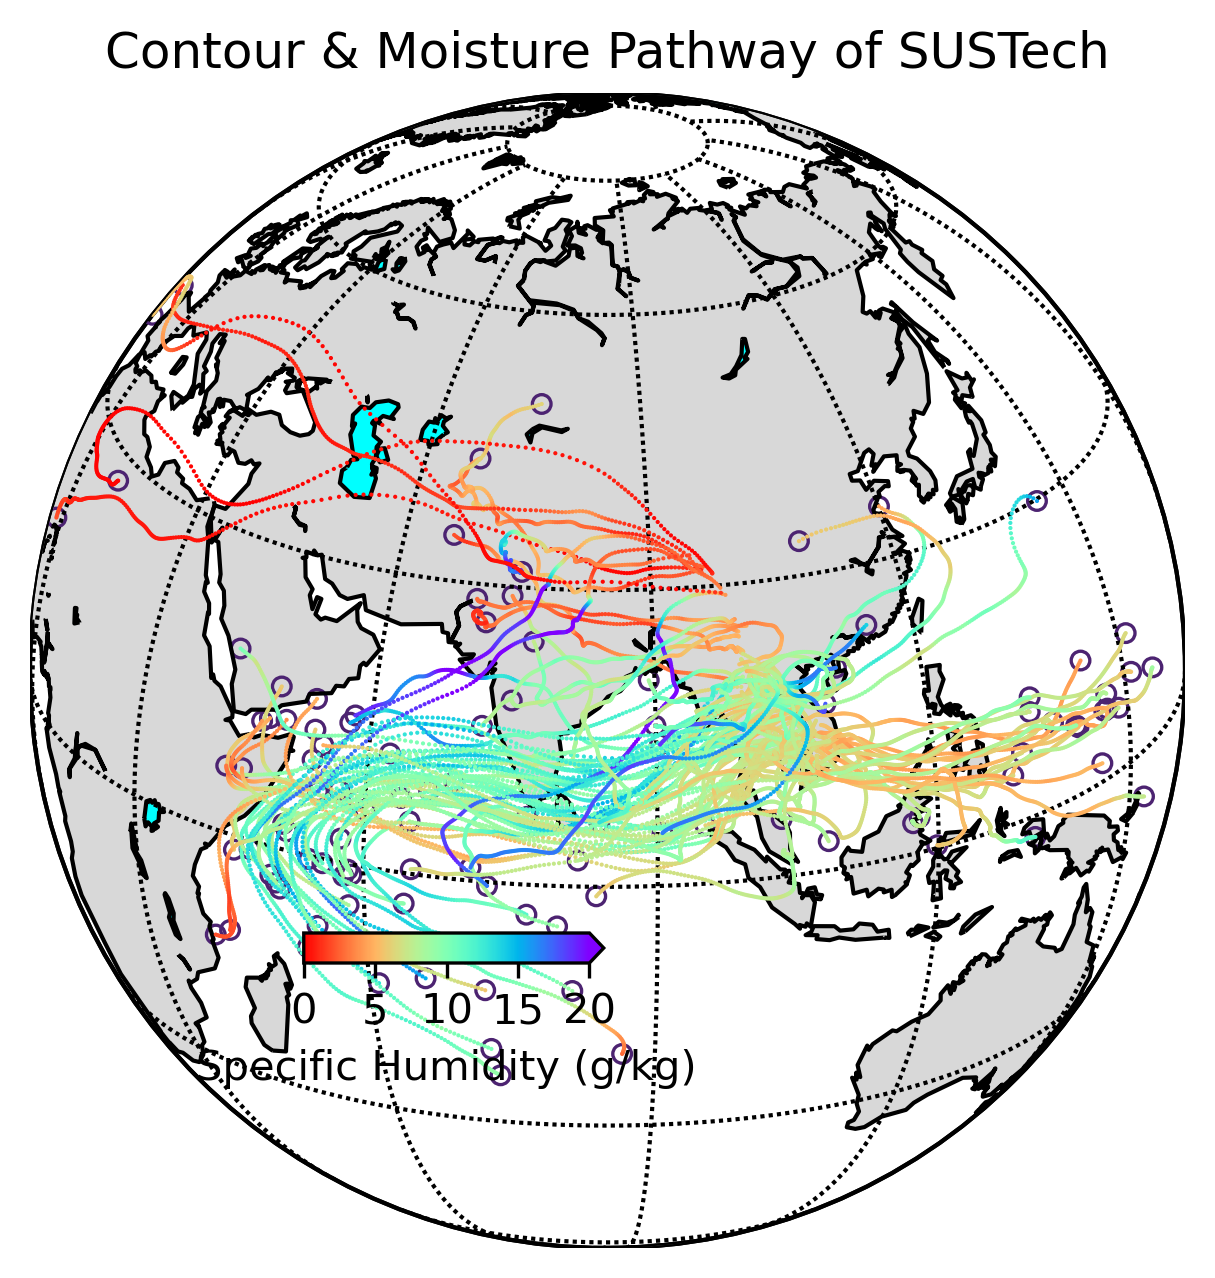

In [25]:
# make some data
nlats = 73; nlons = 145; delta = 2.*np.pi/(nlons-1)
lats = (0.5*np.pi-delta*np.indices((nlats,nlons))[0,:,:])
lons = (delta*np.indices((nlats,nlons))[1,:,:])
wave = 0.75*(np.sin(2.*lats)**8*np.cos(4.*lons))
mean = 0.5*np.cos(2.*lats)*((np.sin(2.*lats))**2 + 2.)


# plot
fig, ax = plt.subplots(figsize=(5,5),dpi=300)
map = Basemap(projection='ortho', lat_0=22, lon_0=85, resolution='c',ax=ax)
map.drawcoastlines(linewidth=1)
map.fillcontinents(color='#d8d8d8', lake_color='aqua')
map.drawmapboundary(fill_color='#FFFFFF')
map.drawmeridians(np.arange(0, 360, 30))
map.drawparallels(np.arange(-90, 90, 30))
x, y = map(lons*180./np.pi, lats*180./np.pi)
#cs = map.contour(x,y,wave+mean,15,linewidths=1.5,cmap='magma')

plt.title('Contour & Moisture Pathway of SUSTech')
# Add trajectories to the map
for traj in trajgroup[::100]:
    mappable= pysplit.traj_scatter(
              traj.data.Specific_Humidity.astype(np.float64).values,
              traj.data.geometry.apply(lambda p: p.x).values,
              traj.data.geometry.apply(lambda p: p.y).values,
              map, colormap=plt.cm.rainbow_r, size=1,
              vmin=0, vmax=20, suppress_printmsg=False)

    last_point = traj.data.geometry.iloc[-1]
    x_last, y_last = map(last_point.x, last_point.y)
    map.scatter(x_last, y_last, marker='o', s=20, facecolor='none', edgecolor='#4c2371', lw=0.8, label='Moisture Source')

# add colorbar
cax = fig.add_axes([0.31, 0.30, 0.2, 0.02])
cbar = plt.colorbar(mappable, cax=cax, orientation='horizontal',extend='max')
cbar.set_label('Specific Humidity (g/kg)')
cbar.set_ticks([0, 5, 10, 15, 20])

if __name__ == "__main__":
    plt.show()

In [33]:
trajgroup[1].data

,Timestep,Pressure,Rainfall,Relative_Humidity,Specific_Humidity,Mixing_Ratio,Terrain_Altitude,Solar_Radiation,geometry,DateTime,Temperature_C,Temperature,Mixing_Depth
Timestep,,,,,,,,,,,,,
0.0,0.0,653.8,0.0,53.7,4.8,4.9,673.9,350.2,POINT Z (103.00000 19.25000 3000.00000),1960-05-14 00:00:00,None,None,None
-1.0,-1.0,649.2,0.0,51.4,4.6,4.6,707.9,96.3,POINT Z (102.86600 19.34700 3017.60000),1960-05-13 23:00:00,None,None,None
-2.0,-2.0,646.0,0.0,49.1,4.3,4.3,741.4,0.0,POINT Z (102.71500 19.42300 3024.30000),1960-05-13 22:00:00,None,None,None
-3.0,-3.0,643.7,0.0,46.5,4.0,4.1,774.4,0.0,POINT Z (102.54900 19.47800 3021.00000),1960-05-13 21:00:00,None,None,None
-4.0,-4.0,643.0,0.0,44.0,3.8,3.8,795.0,0.0,POINT Z (102.36900 19.51500 3009.70000),1960-05-13 20:00:00,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
-212.0,-212.0,627.6,0.0,72.5,1.4,1.4,176.0,648.3,POINT Z (62.78600 40.07200 3665.60000),1960-05-05 04:00:00,None,None,None
-213.0,-213.0,627.2,0.0,73.8,1.4,1.4,169.3,455.3,POINT Z (62.56700 40.33100 3673.20000),1960-05-05 03:00:00,None,None,None
-214.0,-214.0,626.2,0.0,74.6,1.4,1.4,167.1,245.8,POINT Z (62.35000 40.58300 3683.10000),1960-05-05 02:00:00,None,None,None


In [47]:
from geopandas import GeoDataFrame
from pandas import concat

In [79]:
import geopandas as gpd
import pandas as pd
for j in range(1960,1983):
    trajgroup = pysplit.make_trajectorygroup(r'C:/Users/80902/Desktop/run/wet0-4/*_*_*_*3000*'+str(j)+'*00')
    print(str(j)+"_trajectories:",trajgroup.trajcount)
    mulgeopandas = [trajgroup[i].data for i in range(trajgroup.trajcount)]
    list_of_dataframes = []
    for i, gdf in enumerate(mulgeopandas):
        list_of_dataframes.append(gdf.assign(traj=f'traj{i}'))
    merged_gdf = pd.concat(list_of_dataframes, keys=[f'traj{i}' for i in range(len(mulgeopandas))])
    merged_gdf.to_csv(str(j)+'.csv')

1960_trajectories: 10663
1961_trajectories: 28886
1962_trajectories: 13236
1963_trajectories: 15025
1964_trajectories: 14431
1965_trajectories: 12459
1966_trajectories: 16754
1967_trajectories: 26762
1968_trajectories: 20902
1969_trajectories: 22513
1970_trajectories: 18913
1971_trajectories: 17848
1972_trajectories: 24721
1973_trajectories: 20727
1974_trajectories: 11052
1975_trajectories: 13055
1976_trajectories: 13357
1977_trajectories: 14083
1978_trajectories: 12496
1979_trajectories: 25306
1980_trajectories: 12822
1981_trajectories: 14099
1982_trajectories: 14862


In [80]:
import geopandas as gpd
import pandas as pd
for j in range(1983,2009):
    trajgroup = pysplit.make_trajectorygroup(r'C:/Users/80902/Desktop/run/wet4-8/*_*_*_*3000*'+str(j)+'*00')
    print(str(j)+"_trajectories:",trajgroup.trajcount)
    mulgeopandas = [trajgroup[i].data for i in range(trajgroup.trajcount)]
    list_of_dataframes = []
    for i, gdf in enumerate(mulgeopandas):
        list_of_dataframes.append(gdf.assign(traj=f'traj{i}'))
    merged_gdf = pd.concat(list_of_dataframes, keys=[f'traj{i}' for i in range(len(mulgeopandas))])
    merged_gdf.to_csv(str(j)+'.csv')

1983_trajectories: 16793
1984_trajectories: 13667
1985_trajectories: 15947
1986_trajectories: 13394
1987_trajectories: 16365
1988_trajectories: 13884
1989_trajectories: 16582
1990_trajectories: 12769
1991_trajectories: 8387
1992_trajectories: 19237
1993_trajectories: 11868
1994_trajectories: 13967
1995_trajectories: 10824
1996_trajectories: 16482
1997_trajectories: 21818
1998_trajectories: 24206
1999_trajectories: 16490
2000_trajectories: 11048
2001_trajectories: 13190
2002_trajectories: 15707
2003_trajectories: 19377
2004_trajectories: 21040
2005_trajectories: 9526
2006_trajectories: 9973
2007_trajectories: 17959
2008_trajectories: 12502


In [81]:
import geopandas as gpd
import pandas as pd
for j in range(2009,2023):
    trajgroup = pysplit.make_trajectorygroup(r'C:/Users/80902/Desktop/run/wet8-end/*_*_*_*3000*'+str(j)+'*00')
    print(str(j)+"_trajectories:",trajgroup.trajcount)
    mulgeopandas = [trajgroup[i].data for i in range(trajgroup.trajcount)]
    list_of_dataframes = []
    for i, gdf in enumerate(mulgeopandas):
        list_of_dataframes.append(gdf.assign(traj=f'traj{i}'))
    merged_gdf = pd.concat(list_of_dataframes, keys=[f'traj{i}' for i in range(len(mulgeopandas))])
    merged_gdf.to_csv(str(j)+'.csv')

2009_trajectories: 21194
2010_trajectories: 17568
2011_trajectories: 19605
2012_trajectories: 13602
2013_trajectories: 26475
2014_trajectories: 19844
2015_trajectories: 25888
2016_trajectories: 15643
2017_trajectories: 14319
2018_trajectories: 16634
2019_trajectories: 29291
2020_trajectories: 19456
2021_trajectories: 14851
2022_trajectories: 16422


In [82]:
import os
import shutil

# 假设你的文件都在当前工作目录下
directory = os.getcwd()

# 遍历从1960到2022年的年份
for year in range(1960, 2023):
    # 构建旧文件名和新文件名
    old_filename = f"{year}.csv"
    new_filename = f"{year}_pro.csv"

    # 检查文件是否存在再进行重命名
    if os.path.exists(os.path.join(directory, old_filename)):
        os.rename(old_filename, new_filename)
        print(f"Renamed {old_filename} to {new_filename}")
    else:
        print(f"{old_filename} does not exist.")


Renamed 1960.csv to 1960_pro.csv
Renamed 1961.csv to 1961_pro.csv
Renamed 1962.csv to 1962_pro.csv
Renamed 1963.csv to 1963_pro.csv
Renamed 1964.csv to 1964_pro.csv
Renamed 1965.csv to 1965_pro.csv
Renamed 1966.csv to 1966_pro.csv
Renamed 1967.csv to 1967_pro.csv
Renamed 1968.csv to 1968_pro.csv
Renamed 1969.csv to 1969_pro.csv
Renamed 1970.csv to 1970_pro.csv
Renamed 1971.csv to 1971_pro.csv
Renamed 1972.csv to 1972_pro.csv
Renamed 1973.csv to 1973_pro.csv
Renamed 1974.csv to 1974_pro.csv
Renamed 1975.csv to 1975_pro.csv
Renamed 1976.csv to 1976_pro.csv
Renamed 1977.csv to 1977_pro.csv
Renamed 1978.csv to 1978_pro.csv
Renamed 1979.csv to 1979_pro.csv
Renamed 1980.csv to 1980_pro.csv
Renamed 1981.csv to 1981_pro.csv
Renamed 1982.csv to 1982_pro.csv
Renamed 1983.csv to 1983_pro.csv
Renamed 1984.csv to 1984_pro.csv
Renamed 1985.csv to 1985_pro.csv
Renamed 1986.csv to 1986_pro.csv
Renamed 1987.csv to 1987_pro.csv
Renamed 1988.csv to 1988_pro.csv
Renamed 1989.csv to 1989_pro.csv
Renamed 19